# Insurance Claim Fraud Detection Project

In [196]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

Independent Variables
1.	months_as_customer: Number of months of patronage
2.	age: the length of time a customer has lived or a thing has existed
3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6.	policy_csl: is basically Combined Single Limit
7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10.	insured_zip: It is the zip code where the insurance was made
11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12.	insured_education_level: This refers to the Level of education of the customer
13.	insured_occupation: This refers Occupation of the customer
14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16.	capital-gains: This refers to profit accrued due to insurance premium
17.	capital-loss: This refers to the losses incurred due to insurance claims
18.	incident_date: This refers to the date which claims where made by customers
19.	incident_type: This refers to the type of claim/vehicle damage made by customer
20.	collision_type: This refers to the area of damage on the vehicle
21.	incident_severity: This refers to the extent/level of damage
22.	authorities_contacted: This refers to the government agencies that were contacted after damage
23.	incident_state: This refers to the state at which the accident happened
24.	incident_city: This refers to the city at which the accident happened
25.	1ncident_location: This refers to the location at which the accident happened
26.	incident_hour_of_the_day: The period of the day which accident took place
27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
28.	property_damage: This refers to whether property was damaged or not
29.	bodily_injuries: This refers to injuries sustained
30.	witnesses: This refers to the number of witnesses involved
31.	police_report_available: This refers to whether the report on damage was documented or not
32.	total_claim_amount: This refers to the financial implications involved in claims
33.	injury_claim: This refers to physical injuries sustained
34.	property_claim: This refers to property damages during incident
35.	vehicle_claim: This refers to property damages during incident
36.	auto_make: This refers to the make of the vehicle
37.	auto_model: This refers to the model of the vehicle
38.	auto_year: This refers to the year which the vehicle was manufactured
39.	_c39:
40.	fraud_reported


# Import Dataset

In [197]:
df=pd.read_csv("Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [198]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [199]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [200]:
df.sample(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
175,324,46,648509,06-03-2010,IN,100/300,2000,897.89,6000000,618862,...,YES,79600,15920,15920,47760,Jeep,Wrangler,2011,N,NaN
828,105,28,866805,13-12-1995,OH,250/500,500,1082.36,0,452216,...,NO,60500,12100,6050,42350,Audi,A5,1995,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
288,88,25,332892,25-10-2007,IN,250/500,1000,1194.00,0,613583,...,YES,66780,7420,7420,51940,Ford,Escape,2013,Y,NaN
128,274,43,517240,13-05-2001,OH,100/300,2000,1352.31,0,465263,...,YES,63840,10640,10640,42560,BMW,X5,2006,Y,NaN


# Exploratory Data Analysis

In [201]:
df.shape

(1000, 40)

In [202]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [204]:
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

Let replace '?' with np.NaN

In [205]:
df=df.replace('?',np.NaN)

In [206]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [207]:
# Filling the missing value in columns 
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)

In [208]:
# Droping c39 column
df.drop(['_c39'],axis=1,inplace=True)

In [209]:
df.sample(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.1,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
957,205,42,471938,03-02-2008,IL,100/300,2000,1387.7,4000000,470104,...,1,NO,86130,15660,15660,54810,Chevrolet,Silverado,1995,N


<Axes: >

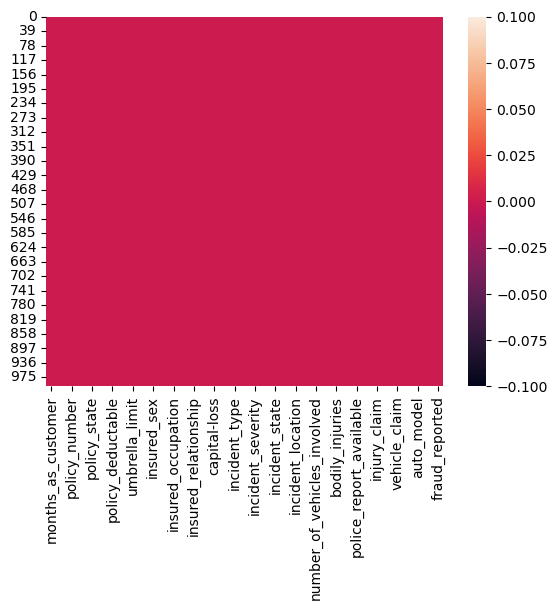

In [210]:
sns.heatmap(df.isnull())

In [211]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [212]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<Axes: xlabel='fraud_reported', ylabel='count'>

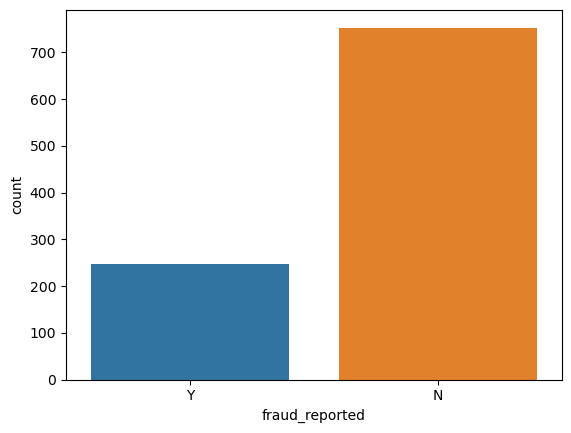

In [213]:
# Countplot of fraud_reported
sns.countplot(x='fraud_reported',data=df)

<Axes: xlabel='age', ylabel='count'>

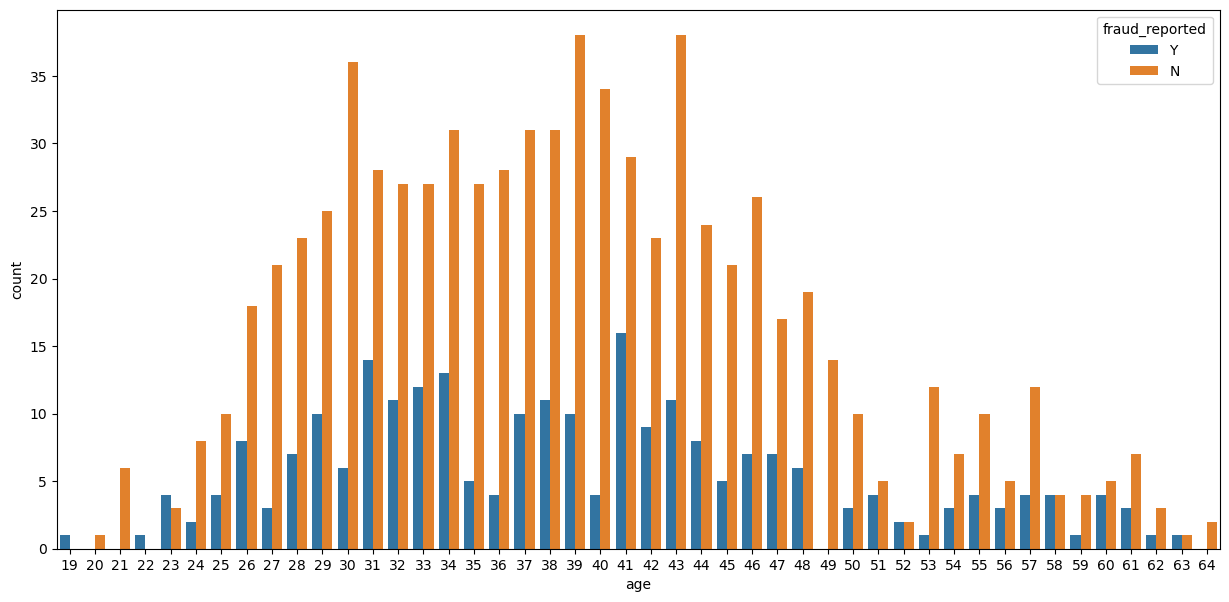

In [214]:
# Age Vs Fraud Cases
plt.figure(figsize=(15,7))
sns.countplot(x='age', hue='fraud_reported', data=df)

<Axes: xlabel='policy_state', ylabel='count'>

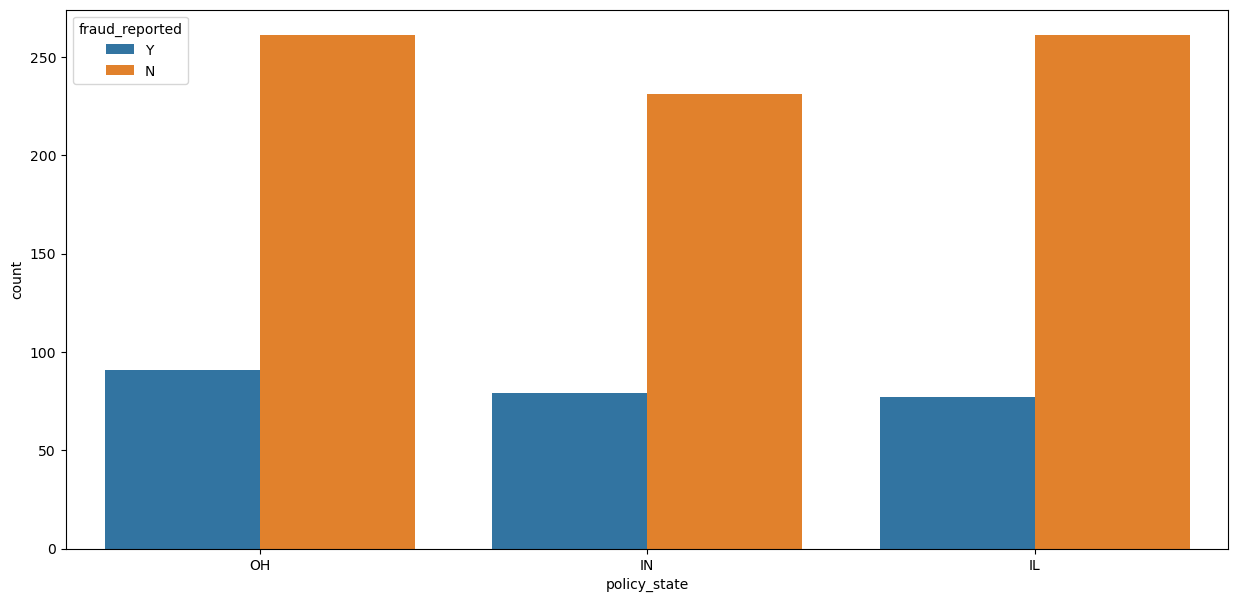

In [215]:
# Policy_state Proportion of Fraud cases
plt.figure(figsize=(15,7))
sns.countplot(x='policy_state', hue='fraud_reported', data=df)

<Axes: xlabel='insured_education_level', ylabel='count'>

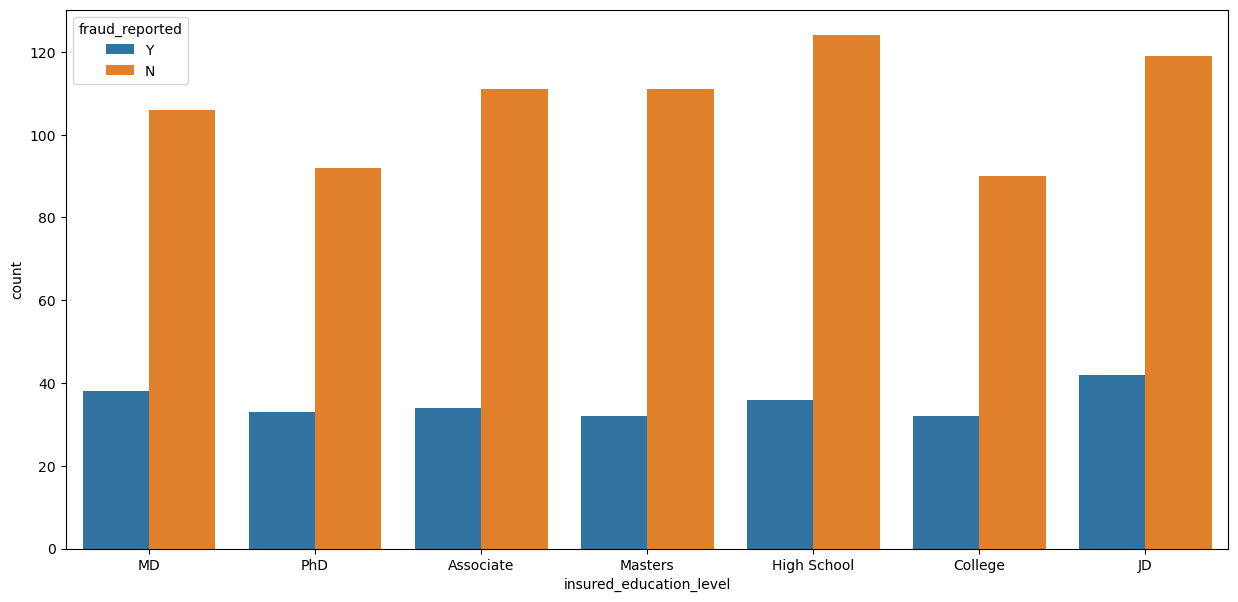

In [216]:
# Insured_education_level Proportion of Fraud cases
plt.figure(figsize=(15,7))
sns.countplot(x='insured_education_level', hue='fraud_reported', data=df)

<Axes: xlabel='insured_sex', ylabel='count'>

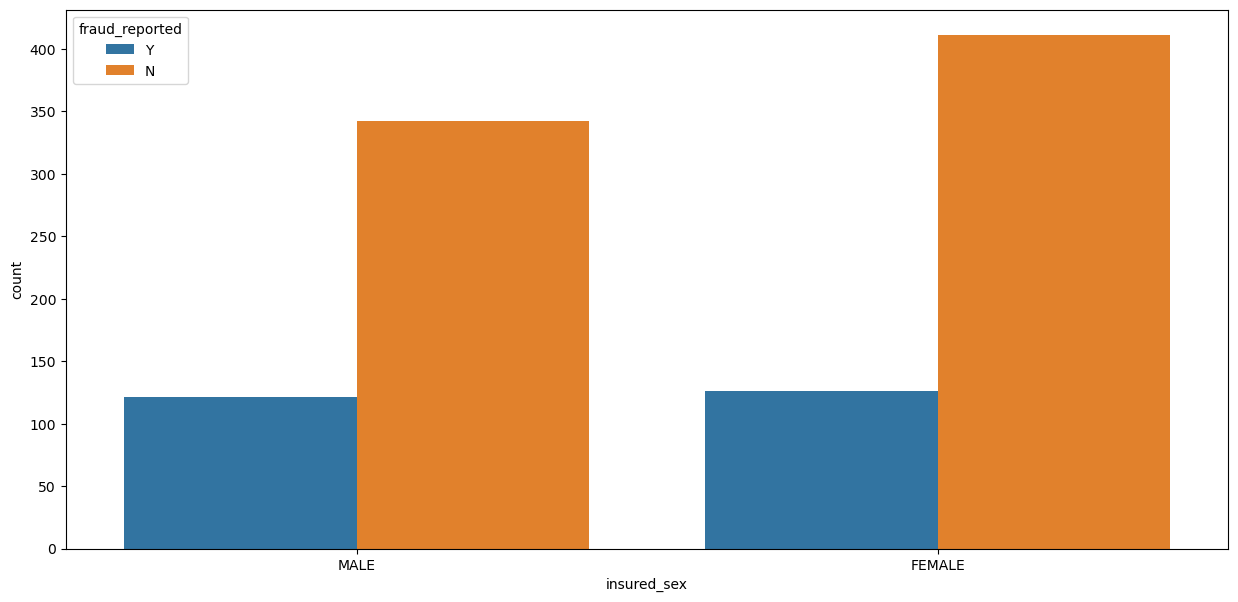

In [217]:
# Insured_sex Proportion of Fraud cases
plt.figure(figsize=(15,7))
sns.countplot(x='insured_sex', hue='fraud_reported', data=df)

<Axes: xlabel='auto_make', ylabel='count'>

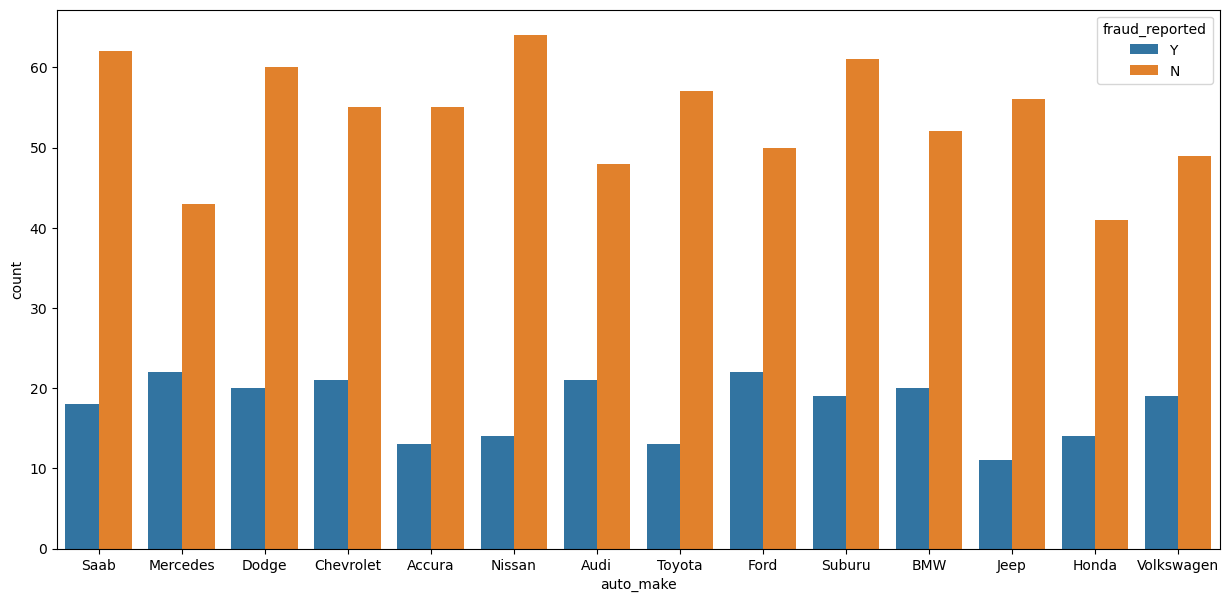

In [218]:
# Auto_make of Fraud cases
plt.figure(figsize=(15,7))
sns.countplot(x='auto_make', hue='fraud_reported', data=df)

<Axes: xlabel='auto_year', ylabel='count'>

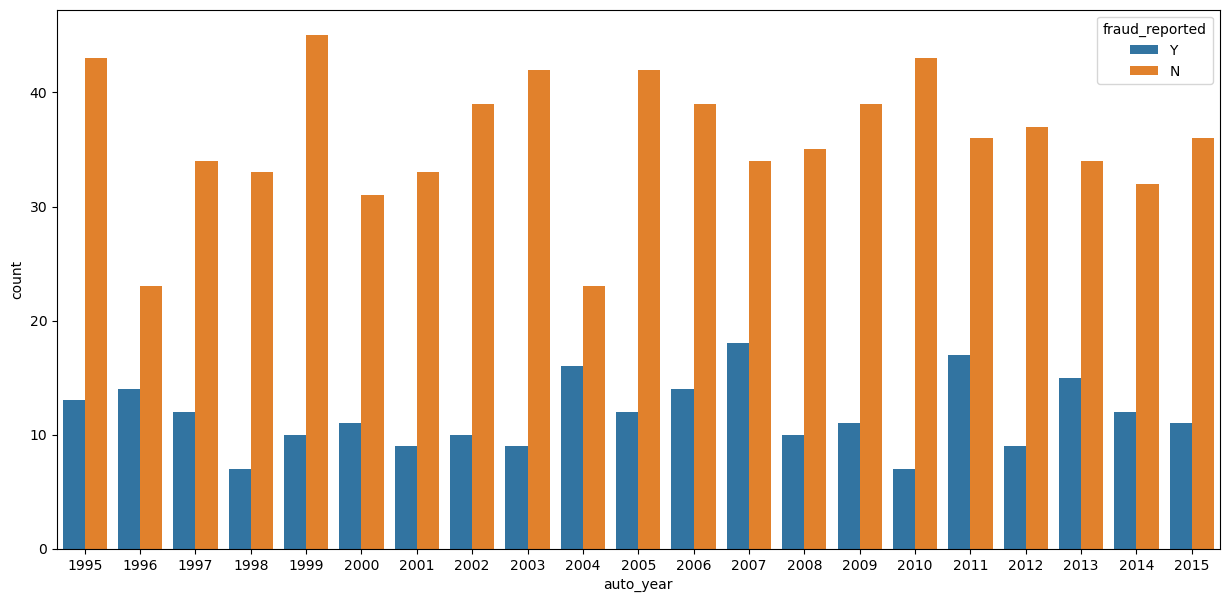

In [219]:
# Auto_year of Fraud cases
plt.figure(figsize=(15,7))
sns.countplot(x='auto_year', hue='fraud_reported', data=df)

<Axes: xlabel='incident_type', ylabel='count'>

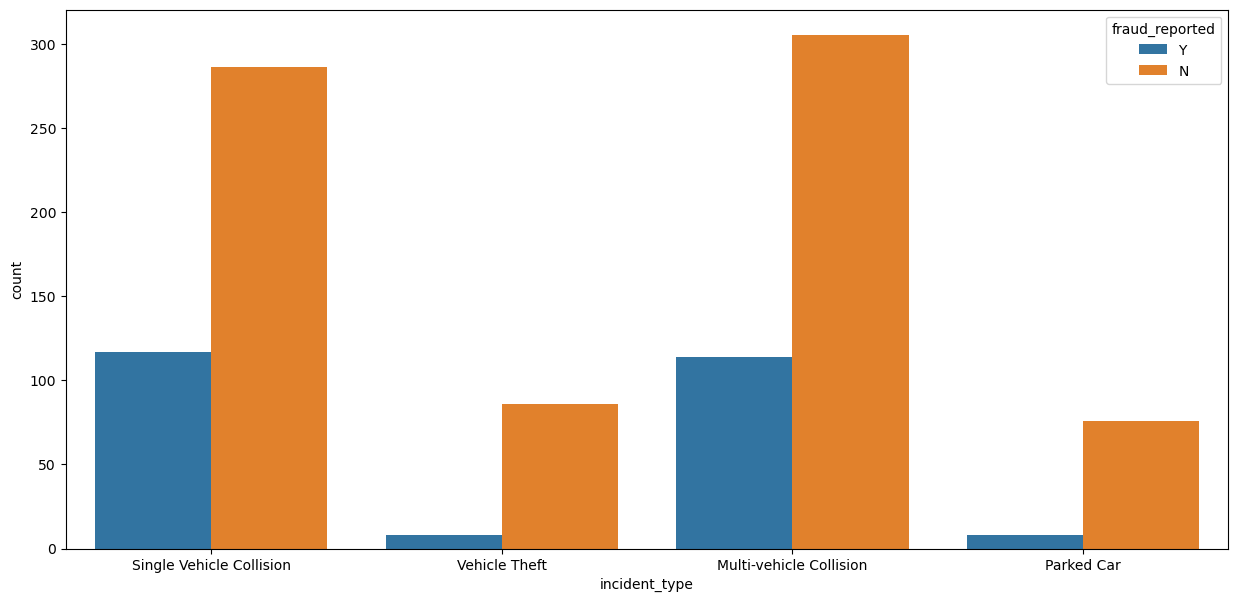

In [220]:
# Different Types of Incidents Vs Fraud cases
plt.figure(figsize=(15,7))
sns.countplot(x='incident_type', hue='fraud_reported', data=df)

<Axes: xlabel='collision_type', ylabel='count'>

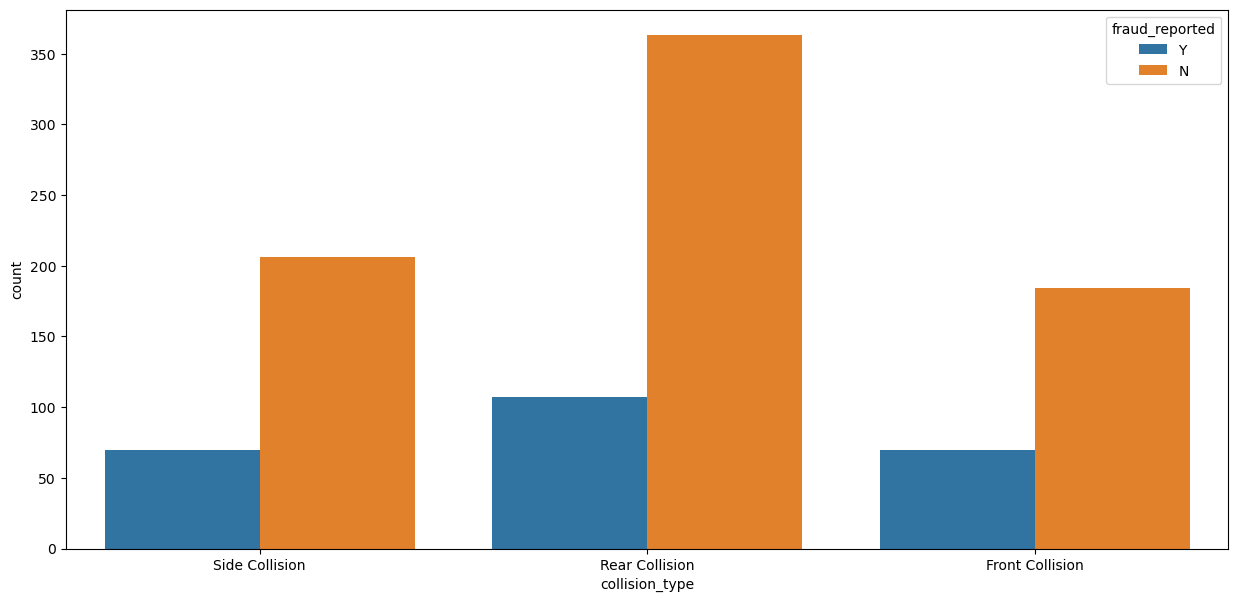

In [221]:
# Different Types of collision Vs Fraud cases
plt.figure(figsize=(15,7))
sns.countplot(x='collision_type', hue='fraud_reported', data=df)

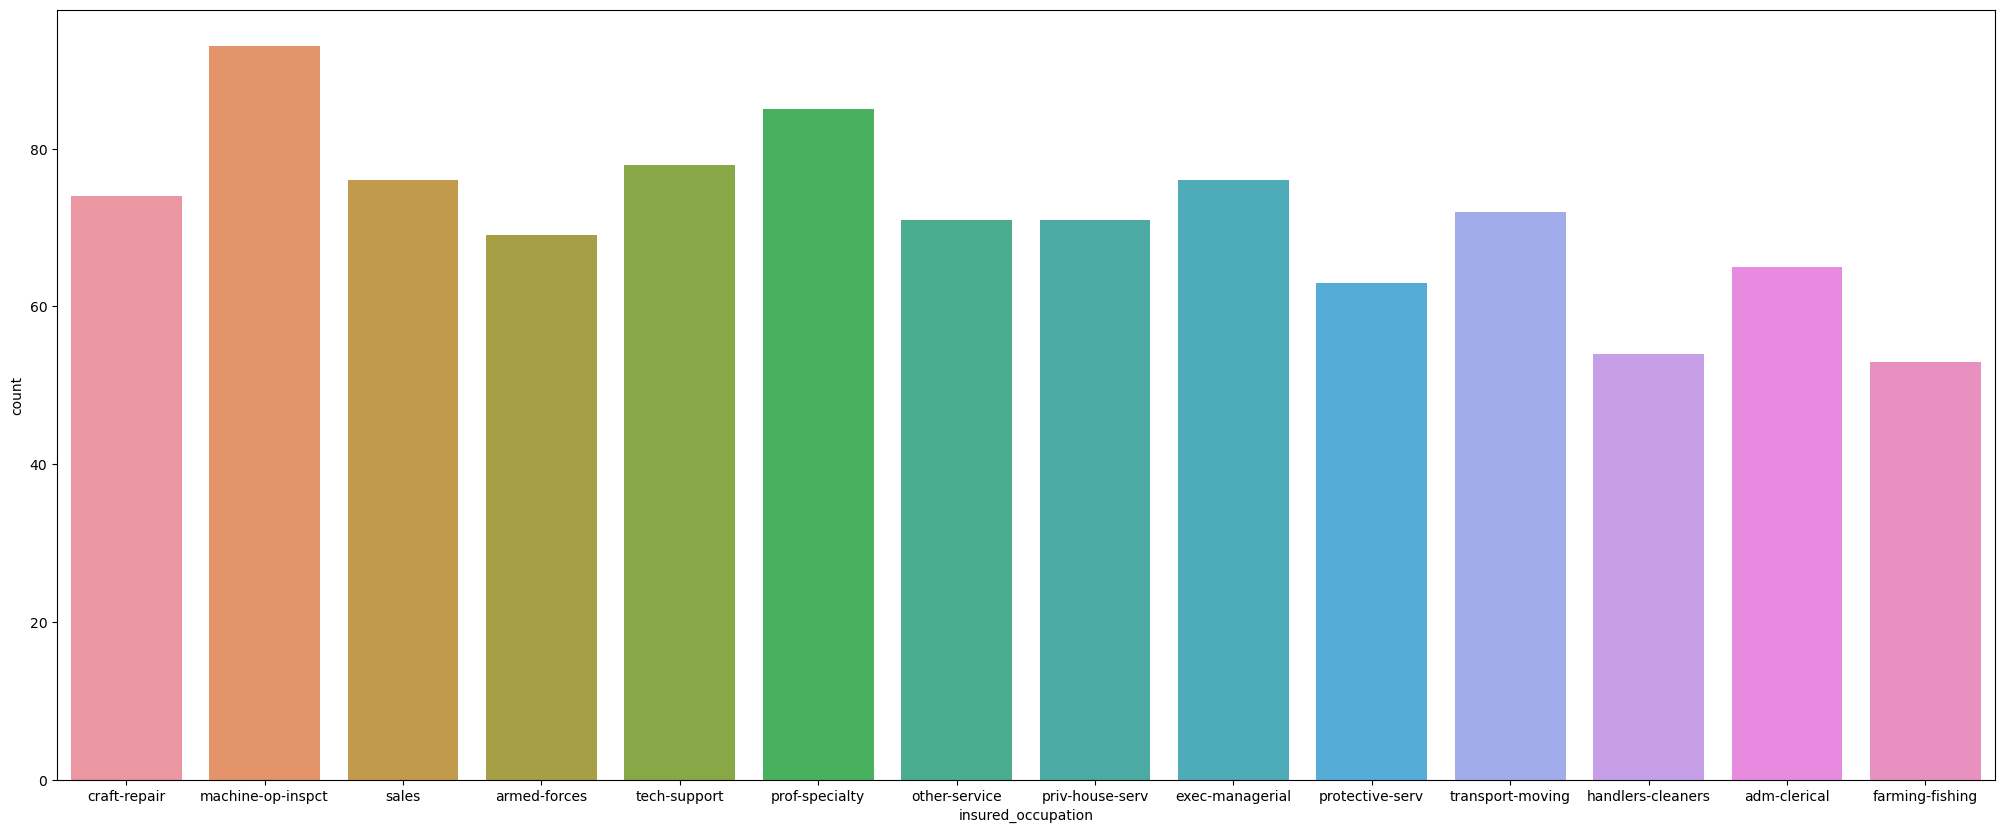

In [222]:
# Occupation of Insured Customers
plt.figure(figsize=(25,10))
sns.countplot(x='insured_occupation',data=df)
plt.show()

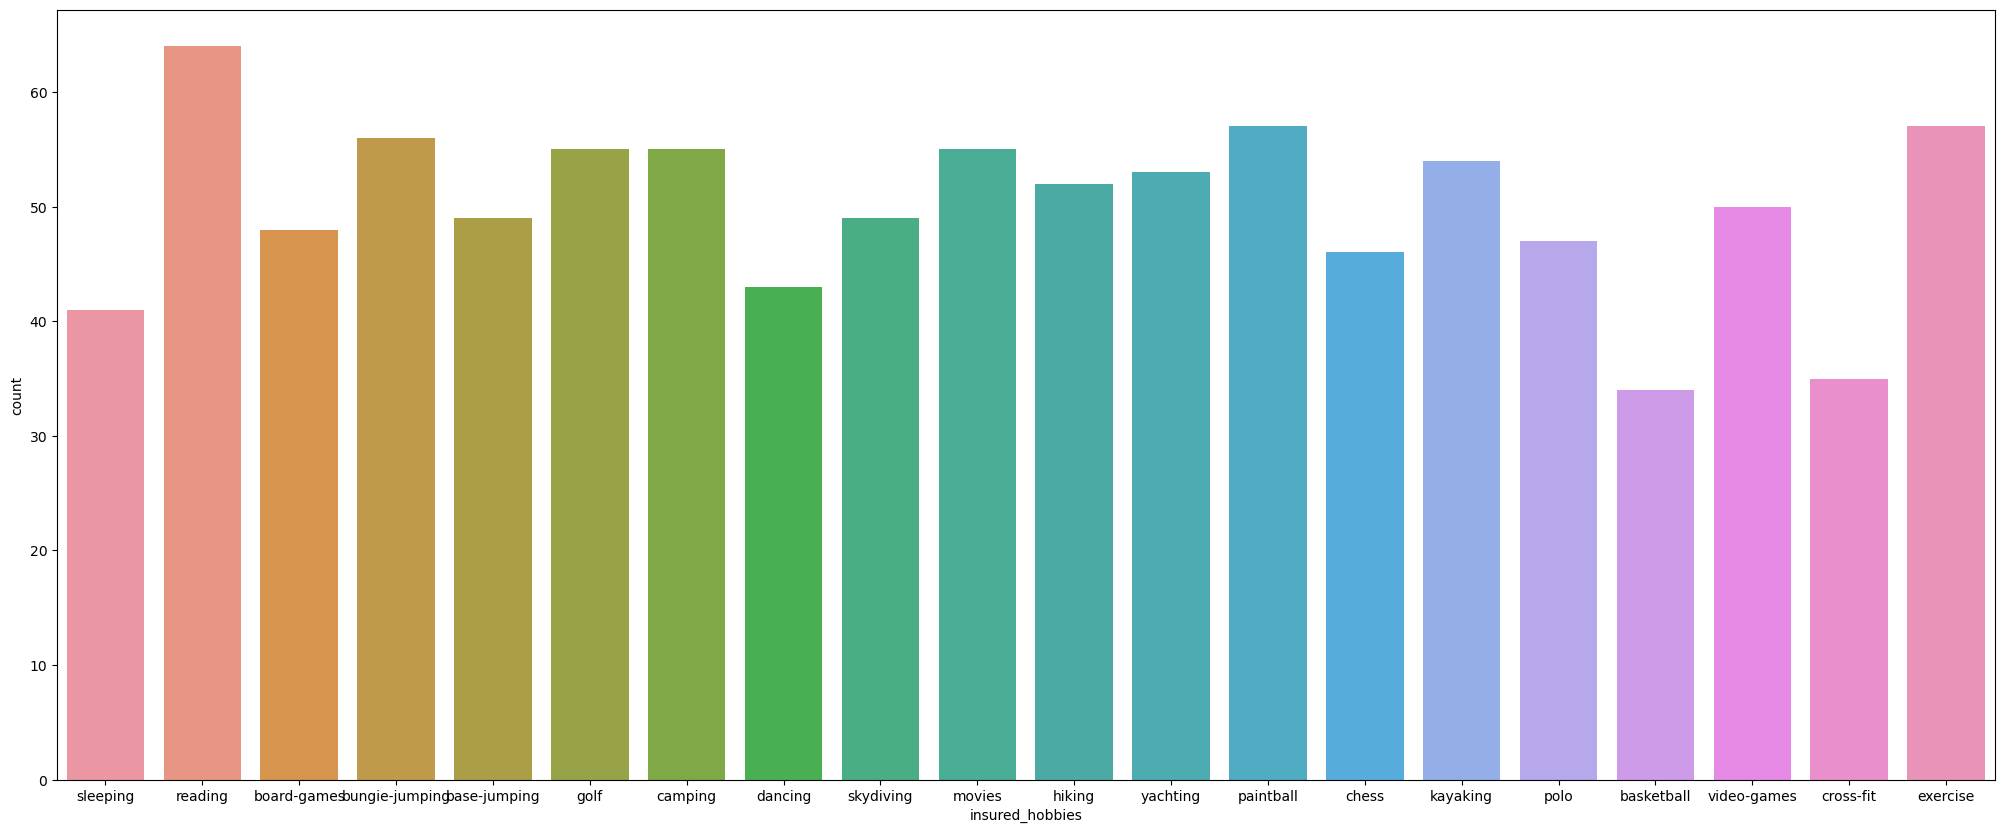

In [223]:
# Hobbies of Insured Customers
plt.figure(figsize=(25,10))
sns.countplot(x='insured_hobbies',data=df)
plt.show()

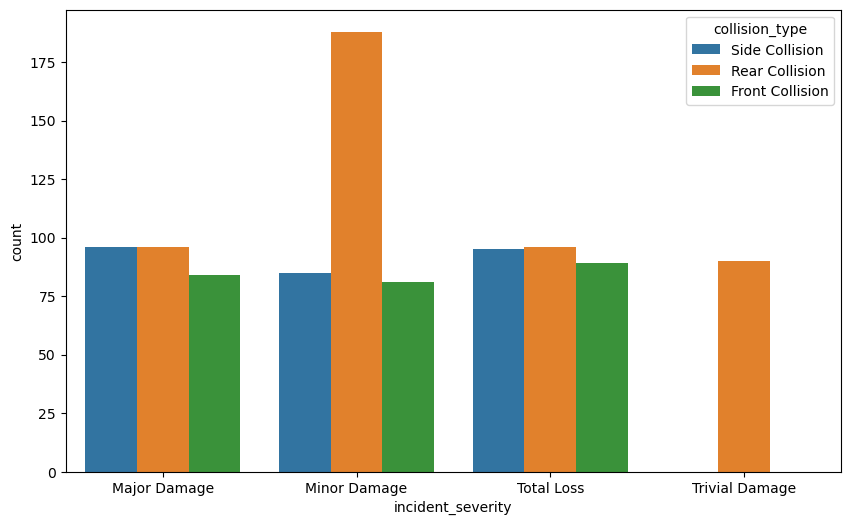

In [224]:
# Incident Severity vs Collision Type
plt.figure(figsize=(10,6))
sns.countplot(x="incident_severity", hue="collision_type", data=df)
plt.show()

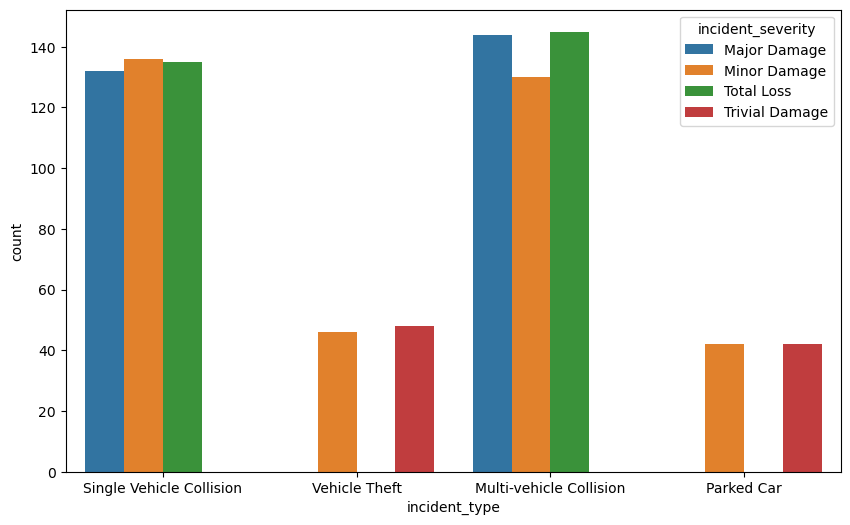

In [225]:
# Incident Type vs Incident Severity
plt.figure(figsize=(10,6))
sns.countplot(x="incident_type", hue="incident_severity", data=df)
plt.show()

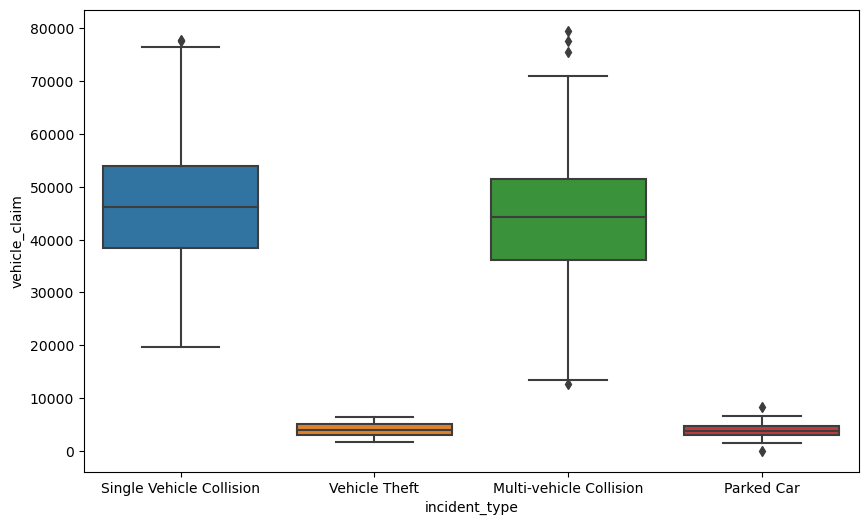

In [226]:
# Incident Type vs Vehicle Claim
plt.figure(figsize=(10,6))
sns.boxplot(x="incident_type", y="vehicle_claim", data=df)
plt.show()

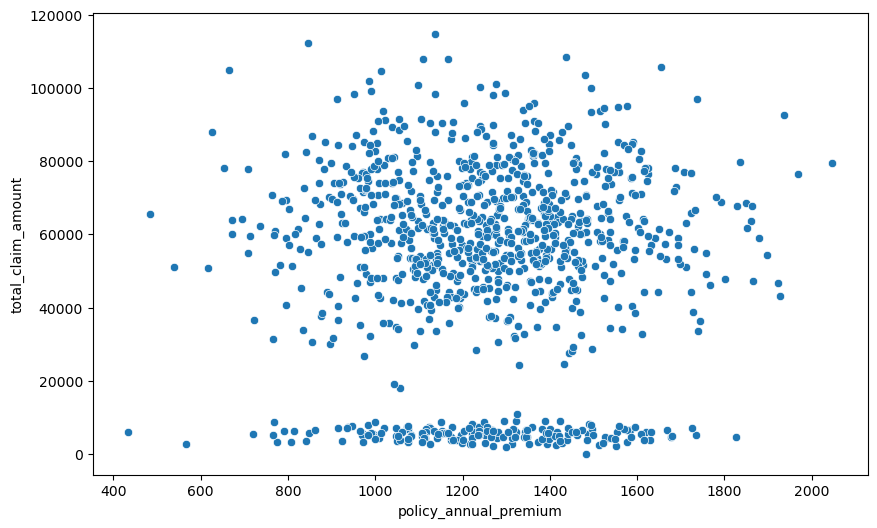

In [227]:
# Total Claim Amount VS Annual Premium 
plt.figure(figsize=(10,6))
sns.scatterplot(x="policy_annual_premium", y="total_claim_amount", data=df)
plt.show()

# Encoding categorical data

In [228]:
Category = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported']

In [229]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.sample(3)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
6,137,34,413978,04-06-2000,1,1,1000,1333.35,0,441716,...,0,0,78650,21450,7150,50050,9,29,2012,0
606,110,27,284834,03-08-2009,2,2,1000,1664.66,0,465921,...,3,0,57500,5750,5750,46000,1,4,2010,0
379,157,32,347984,21-10-2009,2,0,2000,617.11,0,436711,...,2,0,50800,10160,5080,35560,8,12,2013,1


In [230]:
# Droping unnecessary column
df.drop(['policy_csl','policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',  
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year','umbrella_limit'],axis=1,inplace=True)

# Outliers Detection and Removal

months_as_customer                 Axes(0.125,0.77;0.110714x0.11)
age                             Axes(0.257857,0.77;0.110714x0.11)
policy_deductable               Axes(0.390714,0.77;0.110714x0.11)
policy_annual_premium           Axes(0.523571,0.77;0.110714x0.11)
insured_sex                     Axes(0.656429,0.77;0.110714x0.11)
insured_education_level         Axes(0.789286,0.77;0.110714x0.11)
insured_occupation                Axes(0.125,0.638;0.110714x0.11)
insured_relationship           Axes(0.257857,0.638;0.110714x0.11)
capital-gains                  Axes(0.390714,0.638;0.110714x0.11)
capital-loss                   Axes(0.523571,0.638;0.110714x0.11)
incident_type                  Axes(0.656429,0.638;0.110714x0.11)
collision_type                 Axes(0.789286,0.638;0.110714x0.11)
incident_severity                 Axes(0.125,0.506;0.110714x0.11)
authorities_contacted          Axes(0.257857,0.506;0.110714x0.11)
incident_hour_of_the_day       Axes(0.390714,0.506;0.110714x0.11)
number_of_

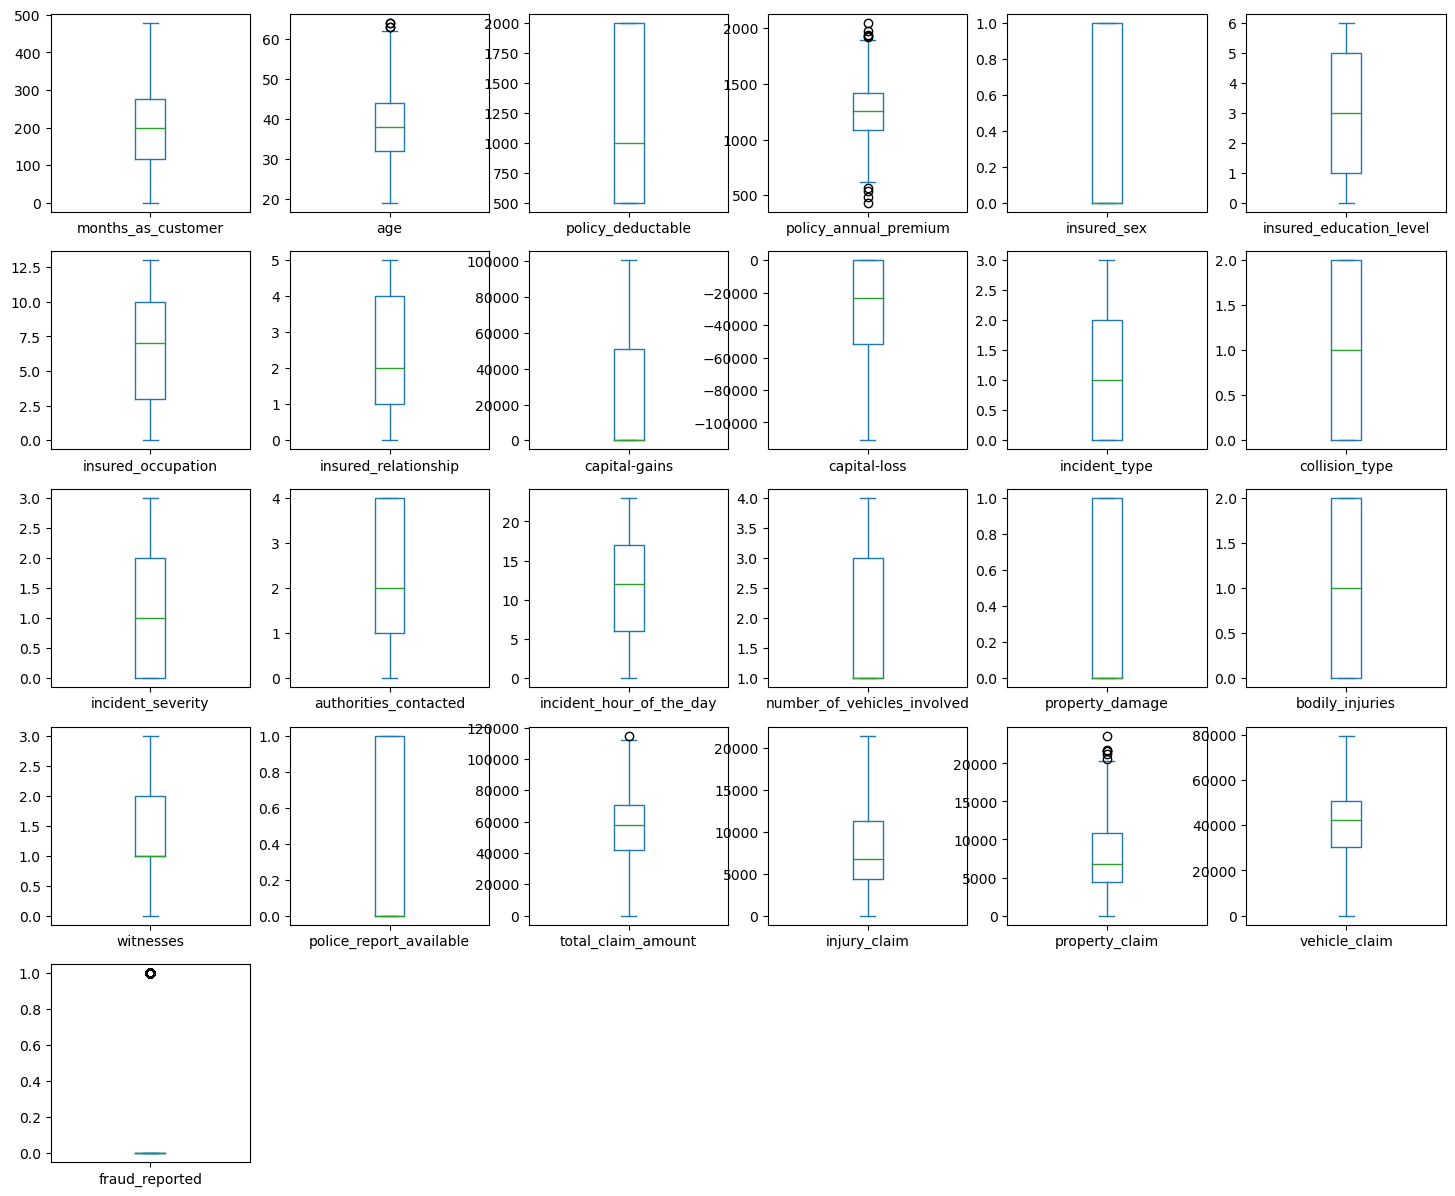

In [231]:
df.plot(kind='box',subplots=True ,layout=(6,6) ,figsize=(18,18))

# Outliers removal using Zscore method

In [232]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,1.078140,0.990836,0.222383,0.616705,1.076953,0.530931,1.158316,1.437957,1.011331,0.953851,...,0.823865,1.520282,0.009759,0.461838,1.478078,0.714257,0.189283,1.165505,0.749653,1.746019
1,0.208995,0.334073,1.412784,0.242521,1.076953,0.530931,0.162558,0.247595,0.901927,0.953851,...,0.823865,0.657773,1.210174,1.338700,0.676554,1.807312,1.363822,1.372696,1.823346,1.746019
2,0.608002,1.088913,1.412784,0.642233,0.928546,1.557877,1.082141,0.347586,0.358023,0.953851,...,1.140056,0.657773,1.229693,1.362107,0.676554,0.686362,0.054644,0.736072,0.785565,0.572731
3,0.452355,0.224613,1.412784,0.652886,0.928546,1.557877,1.407256,0.942766,0.853388,1.267577,...,0.823865,0.657773,0.009759,0.461838,0.676554,0.403135,0.224130,0.219722,0.677607,1.746019
4,0.208995,0.552994,0.222383,1.341980,1.076953,1.522961,1.082141,0.942766,1.467210,0.683741,...,0.823865,0.657773,1.210174,0.438431,0.676554,1.753121,1.257232,1.399654,1.768252,0.572731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.746582,0.103769,0.222383,0.222884,0.928546,1.044404,1.158316,0.942766,0.901927,0.953851,...,0.823865,1.520282,1.210174,0.438431,0.676554,1.305049,2.051155,0.273817,1.224309,0.572731
996,0.704407,0.224613,0.222383,0.739141,0.928546,1.557877,0.584261,1.537947,1.643100,0.953851,...,0.823865,1.520282,1.229693,1.362107,0.676554,2.111466,2.182342,2.214794,1.821868,0.572731
997,0.642767,0.541611,1.039966,0.520739,0.928546,1.044404,1.407256,0.247595,0.358023,0.953851,...,1.140056,0.657773,1.229693,1.362107,1.478078,0.558507,0.013648,0.020826,0.771902,0.572731
998,2.208028,2.523284,1.412784,0.411866,1.076953,1.522961,0.411497,1.537947,0.901927,0.953851,...,0.823865,0.657773,1.210174,0.438431,1.478078,0.219110,0.453708,0.451976,0.073580,0.572731


In [233]:
threshold=3
print(np.where(z<3))
dfnew=df[(z<3).all(axis=1)]

(array([  0,   0,   0, ..., 999, 999, 999], dtype=int64), array([ 0,  1,  2, ..., 22, 23, 24], dtype=int64))


In [234]:
dfnew

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,1000,1406.91,1,4,2,0,53300,0,...,1,1,1,2,1,71610,6510,13020,52080,1
1,228,42,2000,1197.22,1,4,6,2,0,0,...,1,0,0,0,0,5070,780,780,3510,1
2,134,29,2000,1413.14,0,6,11,3,35100,0,...,3,0,2,3,0,34650,7700,3850,23100,0
3,256,41,2000,1415.74,0,6,1,4,48900,-62400,...,1,0,1,2,0,63400,6340,6340,50720,1
4,228,44,1000,1583.91,1,0,11,4,66000,-46000,...,1,0,0,1,0,6500,1300,650,4550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,5,2,4,0,0,...,1,1,0,1,0,87200,17440,8720,61040,0
996,285,41,1000,1436.79,0,6,9,5,70900,0,...,1,1,2,3,0,108480,18080,18080,72320,0
997,130,34,500,1383.49,0,5,1,2,35100,0,...,3,0,2,3,1,67500,7500,7500,52500,0
998,458,62,2000,1356.92,1,0,5,5,0,0,...,1,0,0,1,1,46980,5220,5220,36540,0


In [235]:
df=dfnew.copy()
df.shape

(995, 25)

# Skewness

In [236]:
df.skew()

months_as_customer             0.358958
age                            0.473974
policy_deductable              0.475849
policy_annual_premium          0.033107
insured_sex                    0.143294
insured_education_level        0.001403
insured_occupation            -0.061818
insured_relationship           0.078491
capital-gains                  0.479472
capital-loss                  -0.379708
incident_type                  0.101056
collision_type                -0.033901
incident_severity              0.274925
authorities_contacted         -0.122469
incident_hour_of_the_day      -0.040232
number_of_vehicles_involved    0.503045
property_damage                0.855977
bodily_injuries                0.012979
witnesses                      0.027371
police_report_available        0.804900
total_claim_amount            -0.591848
injury_claim                   0.270253
property_claim                 0.359528
vehicle_claim                 -0.618189
fraud_reported                 1.173586


array([[<Axes: title={'center': 'months_as_customer'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'policy_deductable'}>,
        <Axes: title={'center': 'policy_annual_premium'}>,
        <Axes: title={'center': 'insured_sex'}>],
       [<Axes: title={'center': 'insured_education_level'}>,
        <Axes: title={'center': 'insured_occupation'}>,
        <Axes: title={'center': 'insured_relationship'}>,
        <Axes: title={'center': 'capital-gains'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'incident_type'}>,
        <Axes: title={'center': 'collision_type'}>,
        <Axes: title={'center': 'incident_severity'}>,
        <Axes: title={'center': 'authorities_contacted'}>,
        <Axes: title={'center': 'incident_hour_of_the_day'}>],
       [<Axes: title={'center': 'number_of_vehicles_involved'}>,
        <Axes: title={'center': 'property_damage'}>,
        <Axes: title={'center': 'bodily_injuries'}>,
        <Ax

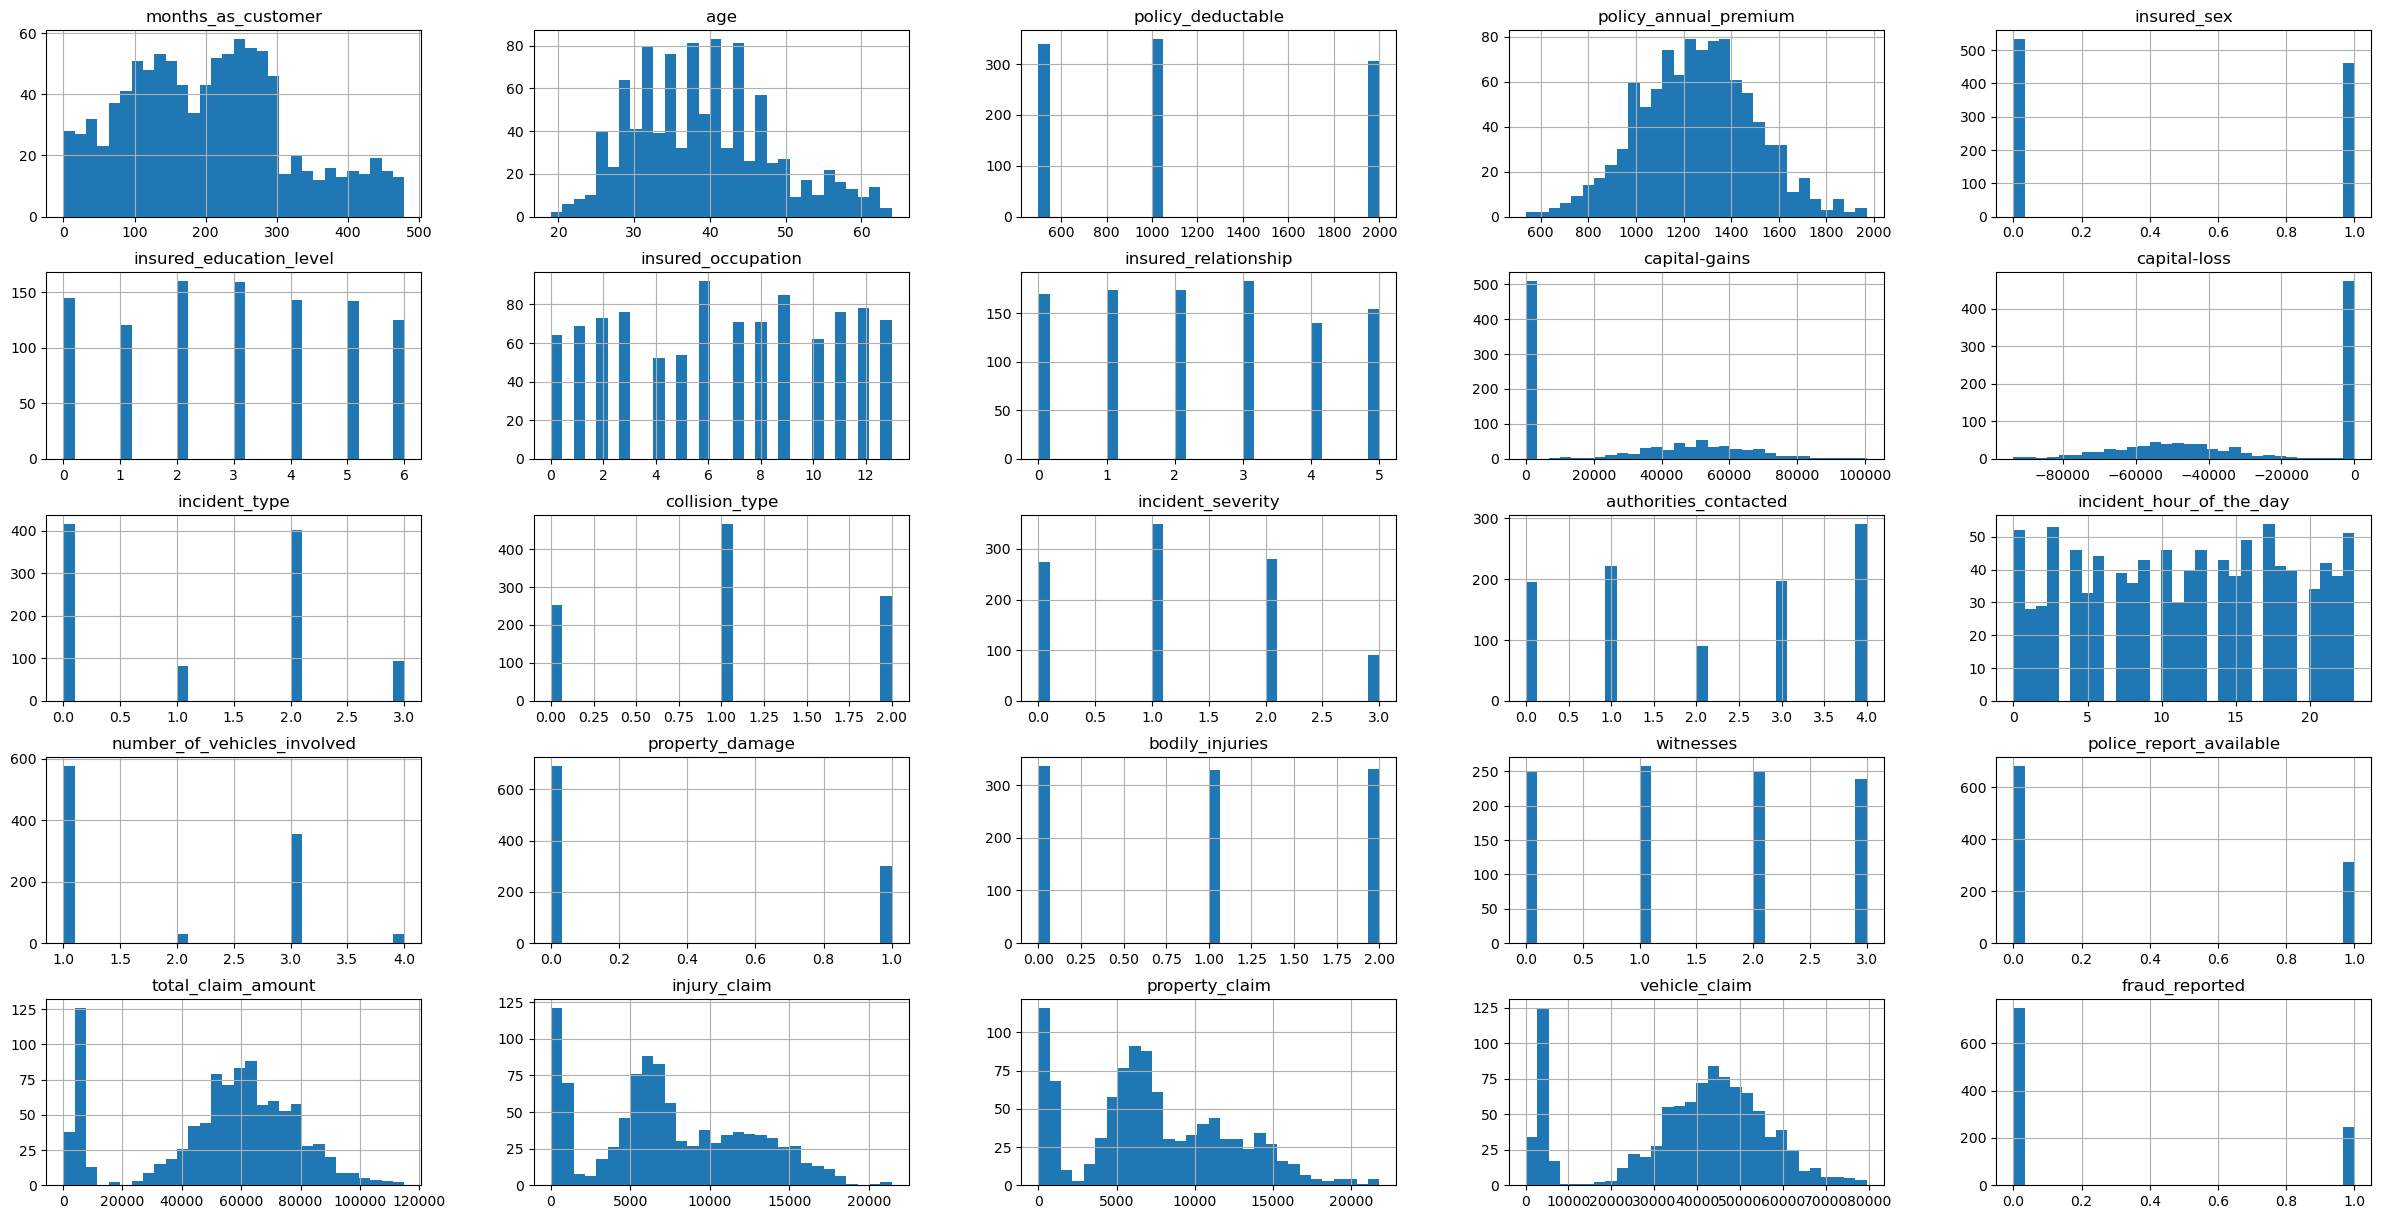

In [237]:
df.hist(bins=30,figsize=(30,15))

# Correalation

In [238]:
cor=df.corr()
cor

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
months_as_customer,1.000000,0.922092,0.023763,-0.003318,0.058878,-0.000845,0.005500,0.071282,0.007940,0.020379,...,0.013802,0.002557,-0.010936,0.063811,-0.018874,0.064344,0.066612,0.041345,0.062170,0.020878
age,0.922092,1.000000,0.026951,0.005931,0.072832,0.001487,0.014124,0.076077,-0.006129,0.007904,...,0.021277,-0.005868,-0.017341,0.056859,-0.018570,0.070098,0.075626,0.064375,0.062025,0.012348
policy_deductable,0.023763,0.026951,1.000000,-0.008983,-0.010368,0.014560,-0.051268,-0.023132,0.033218,-0.019874,...,0.049787,0.015084,-0.025168,0.067627,0.041976,0.023520,0.038980,0.068190,0.005452,0.016663
policy_annual_premium,-0.003318,0.005931,-0.008983,1.000000,0.042200,-0.021483,0.030664,0.006123,-0.010529,0.031106,...,-0.045171,0.079192,0.024883,0.005857,0.029882,0.003252,-0.024420,-0.008353,0.012977,-0.009961
insured_sex,0.058878,0.072832,-0.010368,0.042200,1.000000,0.007493,-0.008487,0.004990,-0.018827,-0.027385,...,0.020361,0.025311,-0.019075,0.045515,0.009259,-0.018585,0.005543,-0.008508,-0.025235,0.031656
insured_education_level,-0.000845,0.001487,0.014560,-0.021483,0.007493,1.000000,-0.021525,-0.021622,0.040328,0.040126,...,-0.001330,-0.048623,-0.011486,0.017569,0.054405,0.076342,0.083696,0.058675,0.070112,0.011532
insured_occupation,0.005500,0.014124,-0.051268,0.030664,-0.008487,-0.021525,1.000000,-0.008934,-0.009242,-0.019584,...,-0.016142,-0.018300,-0.002858,-0.012529,-0.021179,0.005746,0.021879,0.007453,0.000479,0.003815
insured_relationship,0.071282,0.076077,-0.023132,0.006123,0.004990,-0.021622,-0.008934,1.000000,-0.021181,-0.060183,...,-0.051000,-0.030869,-0.000809,0.001377,-0.019165,0.000863,0.026839,0.005454,-0.007116,0.018546
capital-gains,0.007940,-0.006129,0.033218,-0.010529,-0.018827,0.040328,-0.009242,-0.021181,1.000000,-0.043777,...,0.059918,0.000679,0.051280,-0.020595,-0.013478,0.014251,0.025454,-0.006021,0.014863,-0.017807
capital-loss,0.020379,0.007904,-0.019874,0.031106,-0.027385,0.040126,-0.019584,-0.060183,-0.043777,1.000000,...,-0.009819,0.014614,-0.024247,-0.037687,-0.041666,-0.031462,-0.039100,-0.020897,-0.028538,-0.014349


<Axes: >

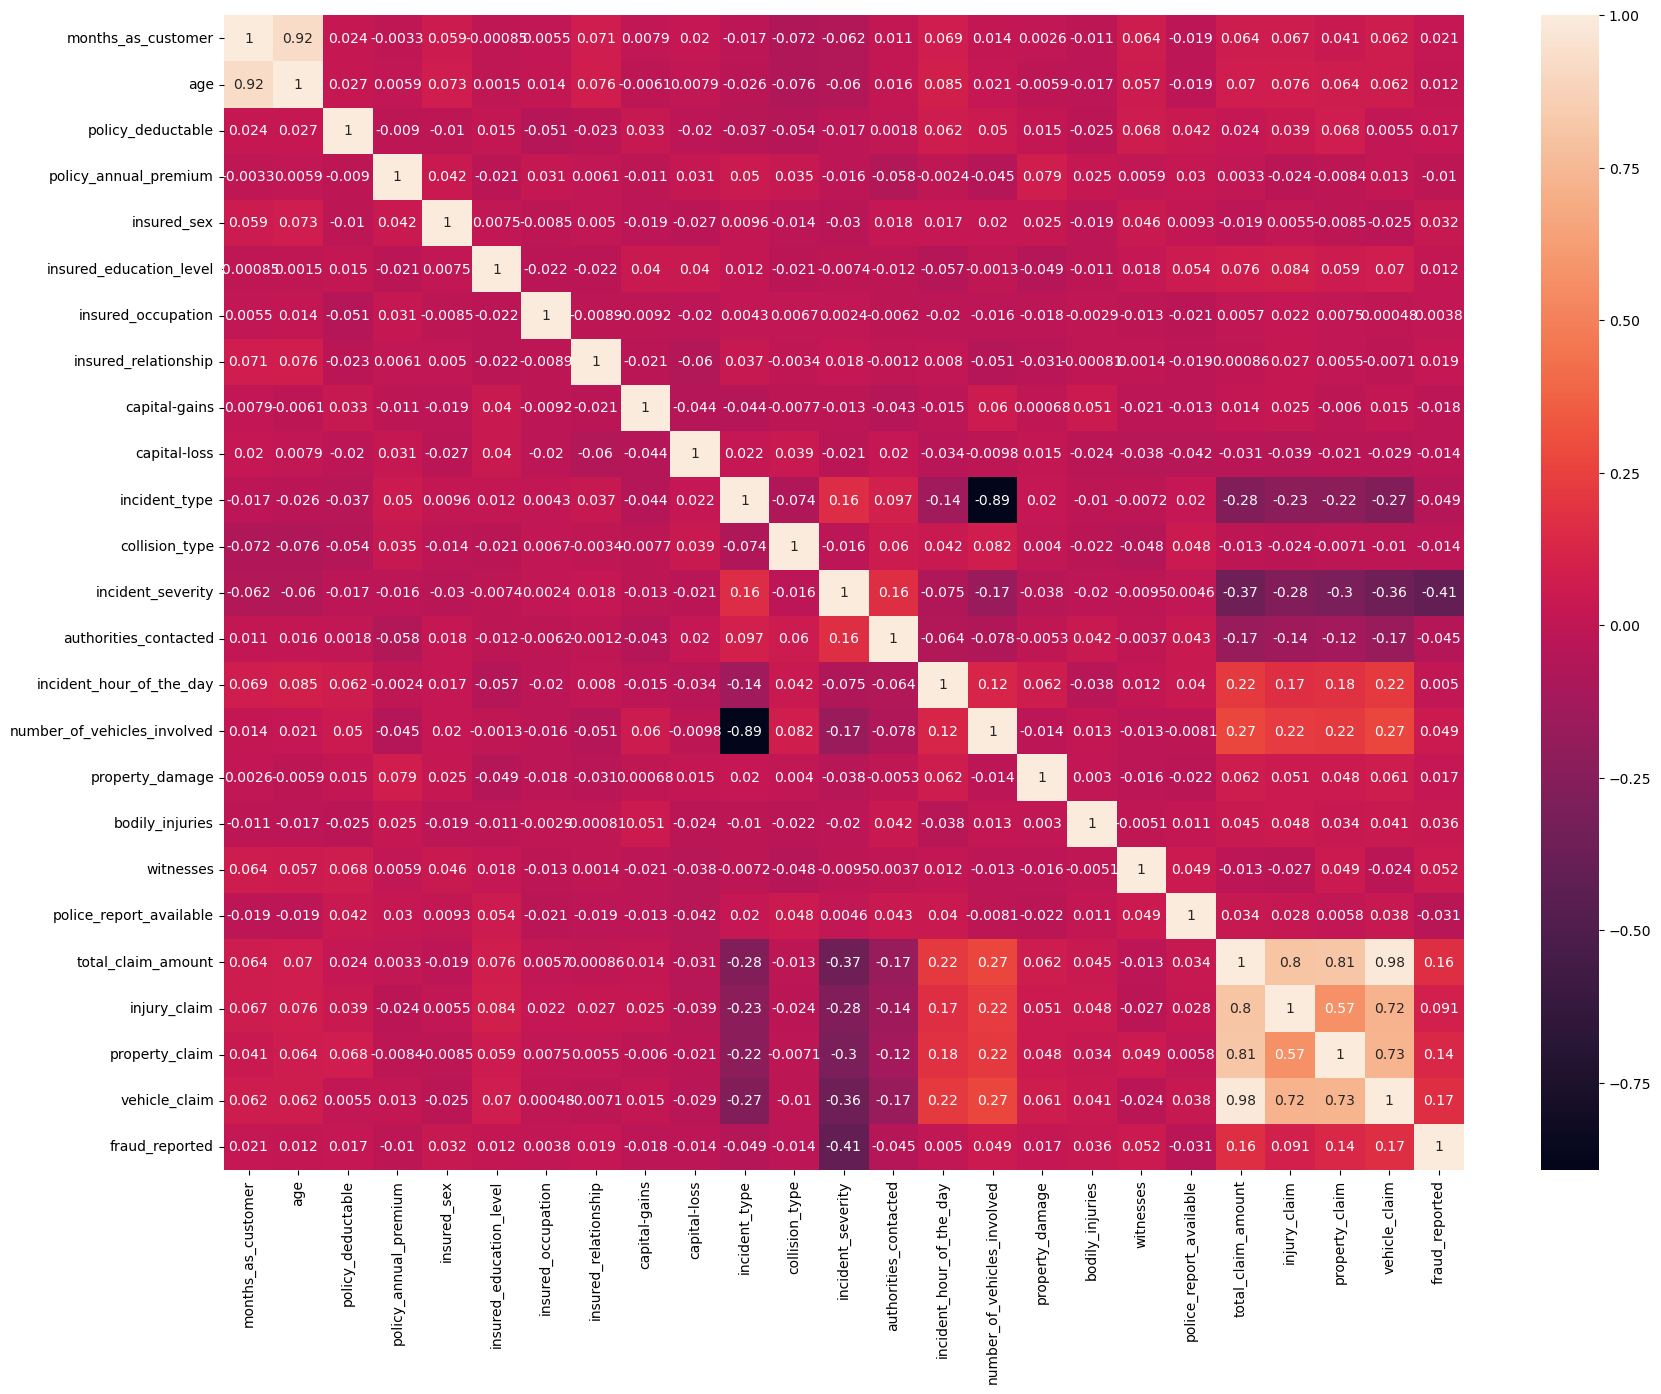

In [239]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

# Machine Learning Model Building

In [240]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [241]:
X=df.drop(['fraud_reported'], axis=1)
Y=df['fraud_reported']

In [242]:
X

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,1406.91,1,4,2,0,53300,0,...,5,1,1,1,2,1,71610,6510,13020,52080
1,228,42,2000,1197.22,1,4,6,2,0,0,...,8,1,0,0,0,0,5070,780,780,3510
2,134,29,2000,1413.14,0,6,11,3,35100,0,...,7,3,0,2,3,0,34650,7700,3850,23100
3,256,41,2000,1415.74,0,6,1,4,48900,-62400,...,5,1,0,1,2,0,63400,6340,6340,50720
4,228,44,1000,1583.91,1,0,11,4,66000,-46000,...,20,1,0,0,1,0,6500,1300,650,4550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,5,2,4,0,0,...,20,1,1,0,1,0,87200,17440,8720,61040
996,285,41,1000,1436.79,0,6,9,5,70900,0,...,23,1,1,2,3,0,108480,18080,18080,72320
997,130,34,500,1383.49,0,5,1,2,35100,0,...,4,3,0,2,3,1,67500,7500,7500,52500
998,458,62,2000,1356.92,1,0,5,5,0,0,...,2,1,0,0,1,1,46980,5220,5220,36540


In [243]:
Y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 995, dtype: int32

In [244]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, random_state=42, test_size=.20)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(796, 24)
(796,)
(199, 24)
(199,)


# Using Logistic Regression

In [245]:
LR=LogisticRegression()
LR.fit(X_train,Y_train)

LogisticRegression()

In [246]:
LRpred=LR.predict(X_test)
LRpred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [247]:
accuracy_score(Y_test,LRpred)

0.7386934673366834

In [248]:
confusion_matrix(Y_test,LRpred)

array([[146,   0],
       [ 52,   1]], dtype=int64)

In [249]:
print(classification_report(Y_test,LRpred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       146
           1       1.00      0.02      0.04        53

    accuracy                           0.74       199
   macro avg       0.87      0.51      0.44       199
weighted avg       0.81      0.74      0.63       199



Acurracy using Logistic Regression is 73.86

# Using Decision Tree Classifier

In [250]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [251]:
DTCpred=DTC.predict(X_test)
DTCpred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0])

In [252]:
accuracy_score(Y_test,DTCpred)

0.7085427135678392

In [253]:
confusion_matrix(Y_test,DTCpred)

array([[114,  32],
       [ 26,  27]], dtype=int64)

In [254]:
print(classification_report(Y_test,DTCpred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       146
           1       0.46      0.51      0.48        53

    accuracy                           0.71       199
   macro avg       0.64      0.65      0.64       199
weighted avg       0.72      0.71      0.71       199



Acurracy using Decision Tree Classifier is 70.85

# Using Random Forest Classifier

In [255]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)

RandomForestClassifier()

In [256]:
RFCpred=RFC.predict(X_test)
RFCpred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0])

In [257]:
accuracy_score(Y_test,RFCpred)

0.7688442211055276

In [259]:
confusion_matrix(Y_test,RFCpred)

array([[134,  12],
       [ 34,  19]], dtype=int64)

In [260]:
print(classification_report(Y_test,RFCpred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       146
           1       0.61      0.36      0.45        53

    accuracy                           0.77       199
   macro avg       0.71      0.64      0.65       199
weighted avg       0.75      0.77      0.75       199



Acurracy using Random Forest Classifier is 76.88

# Saving Model

In [261]:
import joblib
joblib.dump(RFC,'Insurance_Claim.obj')

['Insurance_Claim.obj']